In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
X_unmon= pd.read_csv('../features/modified_datasets/unmon_features.csv')
X_mon= pd.read_csv('../features/modified_datasets/mon_features.csv')
y_mon = pd.read_csv('../features/modified_datasets/mon_labels.csv')

In [3]:
mon_features = pd.concat([X_mon, y_mon], axis=1)
unmon_features = X_unmon.copy()
unmon_features['label'] = -1

In [4]:
scaler = StandardScaler()  
X_mon_scaled = scaler.fit_transform(X_mon)
X_unmon_scaled = scaler.transform(X_unmon)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_mon_scaled, y_mon, test_size=0.2, random_state=42)


In [6]:
l = pd.DataFrame()

def models(model_choice):
    label = []
    if model_choice == "LR":
        model = LogisticRegression(random_state=42, max_iter=1000)
    elif model_choice == "NB":
        model = GaussianNB()    
    elif model_choice == "SVM":
        model = SVC(kernel='linear', random_state=42)
    elif model_choice == "DT":
        model = DecisionTreeClassifier(random_state=42)
    elif model_choice == "RF":
        model = RandomForestClassifier(random_state=42, n_estimators=100)
    elif model_choice == "GB":
       model = GradientBoostingClassifier(random_state=42, n_estimators=100)
    elif model_choice == "k-NN":
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_choice == "DBSCAN":
        model = DBSCAN(eps=0.5, min_samples=5)
    elif model_choice == "k-Means":
        model = KMeans(n_clusters=95, random_state=42)
        
    if model_choice not in ["DBSCAN", "k-Means"]:
        model.fit(X_train, y_train)
        unmon_predictions = model.predict(X_unmon_scaled)
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    else:
        if model_choice == "DBSCAN":
            labels = model.fit_predict(X_unmon_scaled)
        elif model_choice == "k-Means":
            labels = model.fit_predict(X_unmon_scaled)
            
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(X_unmon_scaled)

        plt.figure(figsize=(8, 6))
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
        plt.colorbar()
        plt.title(f"Clustering Results ({model_choice})")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.show()
        unique_labels, counts = np.unique(labels, return_counts=True)
        print("클러스터 분포:")
        for label, count in zip(unique_labels, counts):
            print(f"Cluster {label}: {count} samples")

    if model_choice not in ["DBSCAN", "k-Means"]:
        label = unmon_predictions 
    print(label)
    l[model_choice] = label


In [76]:
models('LR')

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.3161
Precision: 0.2909
Recall: 0.3181
F1-score: 0.2758

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.10      0.17        42
           1       0.23      0.43      0.30        42
           2       0.21      0.54      0.30        35
           3       0.05      0.03      0.04        29
           4       0.60      0.08      0.14        39
           5       0.33      0.13      0.19        45
           6       0.16      0.23      0.19        44
           7       0.18      0.42      0.25        36
           8       0.05      0.06      0.05        34
           9       0.00      0.00      0.00        31
          10       0.80      0.26      0.39        47
          11       0.45      0.43      0.44        35
          12       0.57      0.50      0.53        42
          13       0.00      0.00      0.00        40
          14       0.00      0.00      0.00        36
          15       0.21      0.49      0.30 

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/

In [77]:
models('NB')

Accuracy: 0.1453
Precision: 0.1081
Recall: 0.1432
F1-score: 0.0879

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        45
           6       0.10      0.70      0.18        44
           7       0.09      0.25      0.13        36
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00        31
          10       0.00      0.00      0.00        47
          11       0.11      0.06      0.07        35
          12       0.29      0.17      0.21        42
          13       0.00      0.00      0.00        40
          14       0.00      0.00      0.00        36
          15       0.05      0.17      0.08 

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/minseokim/miniconda/lib/python3.12/site-packages

In [78]:
models('SVM')

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.3926
Precision: 0.3970
Recall: 0.3931
F1-score: 0.3739

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.12      0.20        42
           1       0.31      0.45      0.37        42
           2       0.36      0.57      0.44        35
           3       0.22      0.24      0.23        29
           4       0.31      0.33      0.32        39
           5       0.43      0.13      0.20        45
           6       0.18      0.41      0.25        44
           7       0.18      0.47      0.27        36
           8       0.12      0.15      0.13        34
           9       0.11      0.16      0.13        31
          10       0.50      0.32      0.39        47
          11       0.68      0.43      0.53        35
          12       0.47      0.60      0.53        42
          13       0.00      0.00      0.00        40
          14       0.30      0.17      0.21        36
          15       0.24      0.60      0.34 

In [79]:
models('DT')

Accuracy: 0.5845
Precision: 0.5907
Recall: 0.5865
F1-score: 0.5843

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        42
           1       0.42      0.31      0.36        42
           2       0.88      0.86      0.87        35
           3       0.61      0.66      0.63        29
           4       0.60      0.77      0.67        39
           5       0.63      0.69      0.66        45
           6       0.76      0.70      0.73        44
           7       0.65      0.56      0.60        36
           8       0.65      0.59      0.62        34
           9       0.48      0.52      0.50        31
          10       0.40      0.40      0.40        47
          11       0.51      0.66      0.57        35
          12       0.76      0.74      0.75        42
          13       0.24      0.28      0.26        40
          14       0.41      0.42      0.41        36
          15       0.59      0.63      0.61 

In [7]:
models('RF')

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6929
Precision: 0.6915
Recall: 0.6962
F1-score: 0.6883

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        42
           1       0.58      0.36      0.44        42
           2       0.74      0.91      0.82        35
           3       0.67      0.90      0.76        29
           4       0.59      0.92      0.72        39
           5       0.81      0.87      0.84        45
           6       0.80      0.82      0.81        44
           7       0.59      0.67      0.62        36
           8       0.68      0.76      0.72        34
           9       0.54      0.68      0.60        31
          10       0.79      0.66      0.72        47
          11       0.69      0.69      0.69        35
          12       0.78      0.83      0.80        42
          13       0.41      0.40      0.41        40
          14       0.64      0.50      0.56        36
          15       0.75      0.77      0.76 

In [62]:
models('GB')

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5718
Precision: 0.5793
Recall: 0.5751
F1-score: 0.5719

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.38      0.41        42
           1       0.53      0.38      0.44        42
           2       0.78      0.71      0.75        35
           3       0.57      0.55      0.56        29
           4       0.53      0.74      0.62        39
           5       0.61      0.60      0.61        45
           6       0.65      0.77      0.71        44
           7       0.58      0.61      0.59        36
           8       0.52      0.44      0.48        34
           9       0.33      0.52      0.40        31
          10       0.62      0.60      0.61        47
          11       0.53      0.49      0.51        35
          12       0.76      0.76      0.76        42
          13       0.28      0.17      0.22        40
          14       0.46      0.33      0.39        36
          15       0.52      0.66      0.58 

In [80]:
models('k-NN')

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.4684
Precision: 0.4811
Recall: 0.4690
F1-score: 0.4635

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.31      0.29        42
           1       0.56      0.45      0.50        42
           2       0.32      0.74      0.45        35
           3       0.25      0.45      0.33        29
           4       0.38      0.49      0.43        39
           5       0.38      0.47      0.42        45
           6       0.39      0.64      0.48        44
           7       0.29      0.39      0.33        36
           8       0.24      0.38      0.30        34
           9       0.27      0.61      0.37        31
          10       0.56      0.57      0.57        47
          11       0.32      0.57      0.41        35
          12       0.52      0.57      0.55        42
          13       0.26      0.28      0.27        40
          14       0.24      0.33      0.28        36
          15       0.33      0.43      0.37 

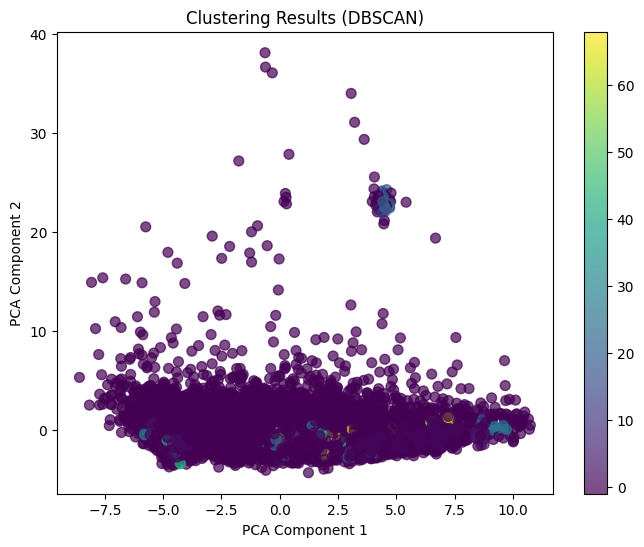

클러스터 분포:
Cluster -1: 7348 samples
Cluster 0: 1509 samples
Cluster 1: 591 samples
Cluster 2: 12 samples
Cluster 3: 27 samples
Cluster 4: 6 samples
Cluster 5: 27 samples
Cluster 6: 23 samples
Cluster 7: 7 samples
Cluster 8: 5 samples
Cluster 9: 22 samples
Cluster 10: 7 samples
Cluster 11: 5 samples
Cluster 12: 5 samples
Cluster 13: 10 samples
Cluster 14: 6 samples
Cluster 15: 10 samples
Cluster 16: 4 samples
Cluster 17: 10 samples
Cluster 18: 29 samples
Cluster 19: 9 samples
Cluster 20: 54 samples
Cluster 21: 17 samples
Cluster 22: 7 samples
Cluster 23: 7 samples
Cluster 24: 6 samples
Cluster 25: 16 samples
Cluster 26: 6 samples
Cluster 27: 5 samples
Cluster 28: 5 samples
Cluster 29: 5 samples
Cluster 30: 4 samples
Cluster 31: 7 samples
Cluster 32: 7 samples
Cluster 33: 6 samples
Cluster 34: 6 samples
Cluster 35: 4 samples
Cluster 36: 9 samples
Cluster 37: 6 samples
Cluster 38: 8 samples
Cluster 39: 3 samples
Cluster 40: 4 samples
Cluster 41: 8 samples
Cluster 42: 5 samples
Cluster 43: 3

In [64]:
models('DBSCAN')

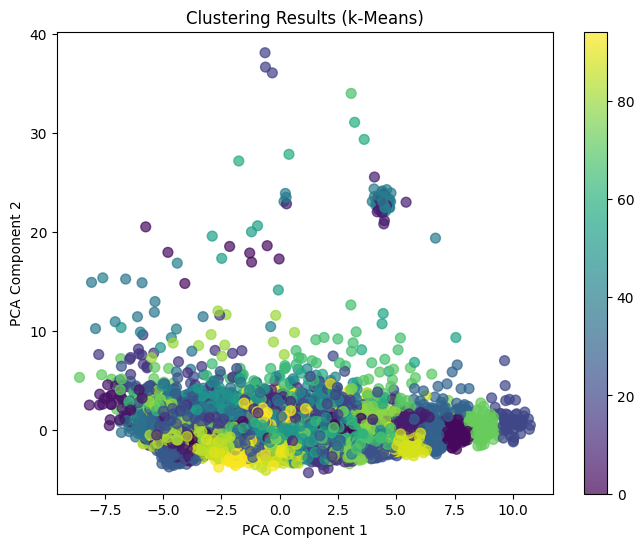

클러스터 분포:
Cluster 0: 197 samples
Cluster 1: 185 samples
Cluster 2: 145 samples
Cluster 3: 8 samples
Cluster 4: 177 samples
Cluster 5: 48 samples
Cluster 6: 254 samples
Cluster 7: 172 samples
Cluster 8: 16 samples
Cluster 9: 288 samples
Cluster 10: 99 samples
Cluster 11: 14 samples
Cluster 12: 83 samples
Cluster 13: 53 samples
Cluster 14: 144 samples
Cluster 15: 18 samples
Cluster 16: 52 samples
Cluster 17: 79 samples
Cluster 18: 3 samples
Cluster 19: 79 samples
Cluster 20: 53 samples
Cluster 21: 27 samples
Cluster 22: 187 samples
Cluster 23: 186 samples
Cluster 24: 50 samples
Cluster 25: 202 samples
Cluster 26: 174 samples
Cluster 27: 295 samples
Cluster 28: 96 samples
Cluster 29: 193 samples
Cluster 30: 48 samples
Cluster 31: 175 samples
Cluster 32: 84 samples
Cluster 33: 61 samples
Cluster 34: 176 samples
Cluster 35: 98 samples
Cluster 36: 51 samples
Cluster 37: 8 samples
Cluster 38: 1 samples
Cluster 39: 42 samples
Cluster 40: 96 samples
Cluster 41: 7 samples
Cluster 42: 95 samples
C

In [81]:
models('k-Means')

---

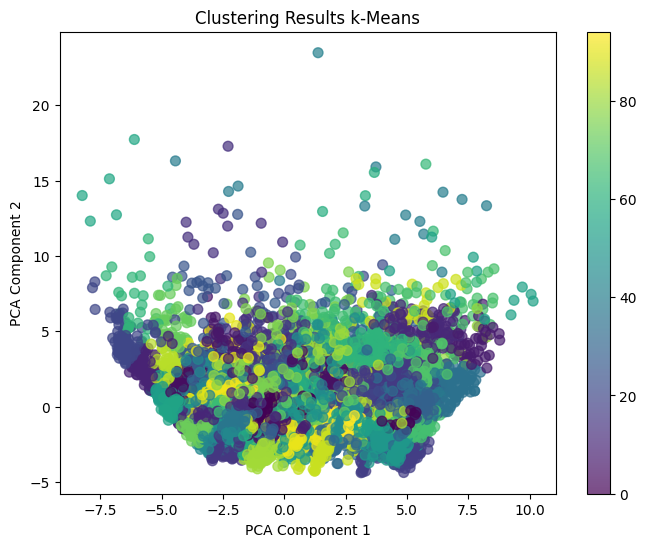

클러스터 분포:
Cluster 0: 158 samples
Cluster 1: 486 samples
Cluster 2: 526 samples
Cluster 3: 226 samples
Cluster 4: 214 samples
Cluster 5: 471 samples
Cluster 6: 73 samples
Cluster 7: 64 samples
Cluster 8: 319 samples
Cluster 9: 102 samples
Cluster 10: 524 samples
Cluster 11: 106 samples
Cluster 12: 135 samples
Cluster 13: 10 samples
Cluster 14: 86 samples
Cluster 15: 332 samples
Cluster 16: 198 samples
Cluster 17: 142 samples
Cluster 18: 182 samples
Cluster 19: 217 samples
Cluster 20: 121 samples
Cluster 21: 110 samples
Cluster 22: 26 samples
Cluster 23: 177 samples
Cluster 24: 502 samples
Cluster 25: 19 samples
Cluster 26: 79 samples
Cluster 27: 22 samples
Cluster 28: 182 samples
Cluster 29: 216 samples
Cluster 30: 78 samples
Cluster 31: 368 samples
Cluster 32: 278 samples
Cluster 33: 228 samples
Cluster 34: 119 samples
Cluster 35: 96 samples
Cluster 36: 521 samples
Cluster 37: 322 samples
Cluster 38: 113 samples
Cluster 39: 5 samples
Cluster 40: 9 samples
Cluster 41: 1 samples
Cluster 4

In [11]:
def testmodel():
    model = KMeans(n_clusters=95, random_state=42)
    labels = model.fit_predict(X_mon_scaled)
            
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X_mon_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar()
    plt.title("Clustering Results k-Means")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()
    unique_labels, counts = np.unique(labels, return_counts=True)
    print("클러스터 분포:")
    for label, count in zip(unique_labels, counts):
        print(f"Cluster {label}: {count} samples")
    return labels
        
y = testmodel()

